In [18]:
from JSAnimation import IPython_display 

In [1]:
from matplotlib import pyplot as plt
from matplotlib import animation
import random

In [2]:
# Deliberately terrible code for teaching purposes
boids_x=[random.uniform(-450,50.0) for x in range(50)]
boids_y=[random.uniform(300.0,600.0) for x in range(50)]
boid_x_velocities=[random.uniform(0,10.0) for x in range(50)]
boid_y_velocities=[random.uniform(-20.0,20.0) for x in range(50)]
boids=(boids_x,boids_y,boid_x_velocities,boid_y_velocities)

In [3]:
def update_boids(boids):
    xs,ys,xvs,yvs=boids
    # Fly towards the middle
    for i in range(len(xs)):
        for j in range(len(xs)):
            xvs[i]=xvs[i]+(xs[j]-xs[i])*0.01/len(xs)
    for i in range(len(xs)):
        for j in range(len(xs)):
            yvs[i]=yvs[i]+(ys[j]-ys[i])*0.01/len(xs)
    # Fly away from nearby boids
    for i in range(len(xs)):
        for j in range(len(xs)):
            if (xs[j]-xs[i])**2 + (ys[j]-ys[i])**2 < 100:
                xvs[i]=xvs[i]+(xs[i]-xs[j])
                yvs[i]=yvs[i]+(ys[i]-ys[j])
    # Try to match speed with nearby boids
    for i in range(len(xs)):
        for j in range(len(xs)):
            if (xs[j]-xs[i])**2 + (ys[j]-ys[i])**2 < 10000:
                xvs[i]=xvs[i]+(xvs[j]-xvs[i])*0.125/len(xs)
                yvs[i]=yvs[i]+(yvs[j]-yvs[i])*0.125/len(xs)
    # Move according to velocities
    for i in range(len(xs)):
        xs[i]=xs[i]+xvs[i]
        ys[i]=ys[i]+yvs[i]

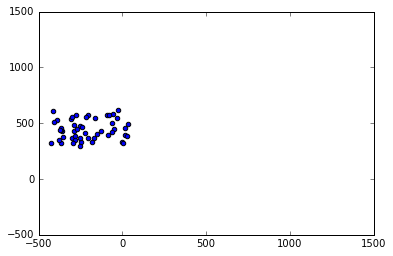

In [21]:
figure=plt.figure()
axes=plt.axes(xlim=(-500,1500), ylim=(-500,1500))
scatter=axes.scatter(boids[0],boids[1])
scatter

In [22]:
def animate(frame):
   update_boids(boids)
   scatter.set_offsets(zip(boids[0],boids[1]))


anim = animation.FuncAnimation(figure, animate,
                               frames=200, interval=50)

In [23]:
anim

TypeError: float() argument must be a string or a number, not 'zip'